### Load the required libraries

In [69]:
import os
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Data Munging

In [70]:
green_data = pd.read_csv(r"C:\Users\wanji\Desktop\Grren Speed\datexDataA13 clean.csv")
green_data


,Camera ID,TimeStamp,Latitude,Longitude,Direction,Highway,Traffic Status,Average Vehicle Speed,Vehicle Flow,Traffic Concentration
0,A13.PS.35385,2019-11-19T07:39:00.000+01:00,49.502388,6.305461,outboundFromTown,A13,freeFlow,153.0,200,0
1,A13.PS.27220,2019-11-19T07:39:00.000+01:00,49.509060,6.206102,outboundFromTown,A13,unknown,NaN,0,0
2,A13.PTAES.4962,2019-11-19T07:39:00.000+01:00,49.530857,5.941860,inboundTowardsTown,A13,freeFlow,101.0,1881,4
3,A13.PS.13460,2019-11-19T07:39:00.000+01:00,49.511353,6.031762,outboundFromTown,A13,unknown,NaN,0,0
4,A13.SP.23974,2019-11-19T07:39:00.000+01:00,49.508278,6.163718,inboundTowardsTown,A13,freeFlow,123.0,2716,3
...,...,...,...,...,...,...,...,...,...,...
816863,A13.PTMAS.39179,2019-12-26T09:34:00.000+01:00,49.480038,6.343385,outboundFromTown,A13,freeFlow,100.0,207,0
816864,A13.STFRP.26477,2019-12-26T09:34:00.000+01:00,49.507000,6.196411,inboundTowardsTown,A13,freeFlow,93.0,174,1
816865,A13.SP.35385,2019-12-26T09:34:00.000+01:00,49.502422,6.305594,inboundTowardsTown,A13,freeFlow,132.0,153,0
816866,A13.SP.7944,2019-12-26T09:34:00.000+01:00,49.518810,5.972471,outboundFromTown,A13,freeFlow,92.0,253,0


### Understanding the data
* `Dataset Info`
* `Shape`
* `Columns,Columns names and data types`

In [71]:
# Function to know the info of the datasets
def create_dataset_info(dataset):
    if isinstance(dataset, pd.DataFrame):
        info = dataset.info()
        return info
    else:
        return "Invalid dataset type. Please provide a Pandas DataFrame."
# Assuming you have a dataset named 'sales_data'
dataset_info = create_dataset_info(green_data)
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816868 entries, 0 to 816867
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Camera ID              816868 non-null  object 
 1   TimeStamp              816868 non-null  object 
 2   Latitude               816868 non-null  float64
 3   Longitude              816868 non-null  float64
 4   Direction              816868 non-null  object 
 5   Highway                816868 non-null  object 
 6   Traffic Status         816868 non-null  object 
 7   Average Vehicle Speed  613420 non-null  float64
 8   Vehicle Flow           816868 non-null  int64  
 9   Traffic Concentration  816868 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 62.3+ MB
None


In [72]:
# Function to know the shape 
def check_dataset_shape(dataset):
    if isinstance(dataset, np.ndarray):
        print("Dataset shape:", dataset.shape)
    elif isinstance(dataset, pd.DataFrame):
        print("Dataset shape:", dataset.shape)
    else:
        print("Invalid dataset type. Please provide a NumPy array or a Pandas DataFrame.")
        
check_dataset_shape(green_data)

Dataset shape: (816868, 10)


In [73]:
# Function to know statistics
def get_dataset_statistics_describe(dataset):

    dataset_describe = dataset.describe()
    print(dataset_describe)


# Call the function to get information about the dataset
get_dataset_statistics_describe(green_data)

            Latitude      Longitude  Average Vehicle Speed   Vehicle Flow  \
count  816868.000000  816868.000000          613420.000000  816868.000000   
mean       49.508072       6.157052             103.492835     544.078395   
std         0.051175       0.160656              20.046577     607.458282   
min         7.000000       5.903059               0.000000       0.000000   
25%        49.493477       5.972471              92.000000      35.000000   
50%        49.509060       6.194627             103.000000     309.000000   
75%        49.519505       6.322593             116.000000     875.000000   
max        49.555190       6.364823             250.000000    5186.000000   

       Traffic Concentration  
count          816868.000000  
mean                1.272714  
std                 1.990619  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 2.000000  
max                48.000000  


In [74]:
# Examine the columns in the dataset
green_data.columns

Index(['Camera ID', 'TimeStamp', 'Latitude', 'Longitude', 'Direction',
       'Highway', 'Traffic Status', 'Average Vehicle Speed', 'Vehicle Flow',
       'Traffic Concentration'],
      dtype='object')

In [75]:
# Check for duplicates
def dataset_duplicated(dataset):
  
    dataset_duplicated = dataset.duplicated().sum()
    print(dataset_duplicated)


dataset_duplicated(green_data)

326505


### 2) Data Cleaning

In [76]:
# Check for duplicates
def dataset_duplicated(dataset):
  
    dataset_duplicated = dataset.duplicated().sum()
    print(dataset_duplicated)


dataset_duplicated(green_data)

326505


In [77]:
# Drop the duplicates
def drop_duplicates(dataset):
    dataset.drop_duplicates(inplace = True)
    
drop_duplicates(green_data) 

In [78]:
# Confirm/check for duplictes
green_data.duplicated().sum()

0

* Missing Values

In [79]:
# Check the percentage of the missing values
def print_missing_values(green_data):

    # Get columns with missing values
    columns_with_missing = green_data.columns[green_data.isnull().any()].tolist()

    # Calculate sum and percentage of missing values for each column
    missing_values_sum = green_data[columns_with_missing].isnull().sum()
    missing_values_percentage = (missing_values_sum / len(green_data)) * 100

    # Create a table with the missing values information
    missing_values_table = pd.DataFrame({
        'Column': columns_with_missing,
        'Missing Values': missing_values_sum,
        'Percentage': missing_values_percentage
    })

    # Print the table with column names and their respective missing values
    print(f"{'Column':<20} {'Missing Values':<15} {'Percentage':<15}")
    for _, row in missing_values_table.iterrows():
        print(f"{row['Column']:<20} {row['Missing Values']:<15} {row['Percentage']:<15.2f}")

print_missing_values(green_data)

Column               Missing Values  Percentage     
Average Vehicle Speed 122148          24.91          


In [80]:
mean_speed = green_data['Average Vehicle Speed'].mean()
green_data['Average Vehicle Speed'].fillna(mean_speed, inplace = True)

In [81]:
# Confirm any more missing values
green_data.isnull().sum()

Camera ID                0
TimeStamp                0
Latitude                 0
Longitude                0
Direction                0
Highway                  0
Traffic Status           0
Average Vehicle Speed    0
Vehicle Flow             0
Traffic Concentration    0
dtype: int64

### EDA

In [82]:
# Remove the time zone information (+01:00) from the 'TimeStamp' column
green_data['TimeStamp'] = green_data['TimeStamp'].str.replace(r'\+\d+:\d+', '', regex=True)

# Convert 'TimeStamp' to datetime
green_data['TimeStamp'] = pd.to_datetime(green_data['TimeStamp'], format='%Y-%m-%dT%H:%M:%S.000', errors='coerce')

# Check the updated 'TimeStamp' column
print(green_data['TimeStamp'])


0        2019-11-19 07:39:00
1        2019-11-19 07:39:00
2        2019-11-19 07:39:00
3        2019-11-19 07:39:00
4        2019-11-19 07:39:00
                 ...        
816817   2019-12-26 09:34:00
816818   2019-12-26 09:34:00
816819   2019-12-26 09:34:00
816820   2019-12-26 09:34:00
816821   2019-12-26 09:34:00
Name: TimeStamp, Length: 490363, dtype: datetime64[ns]


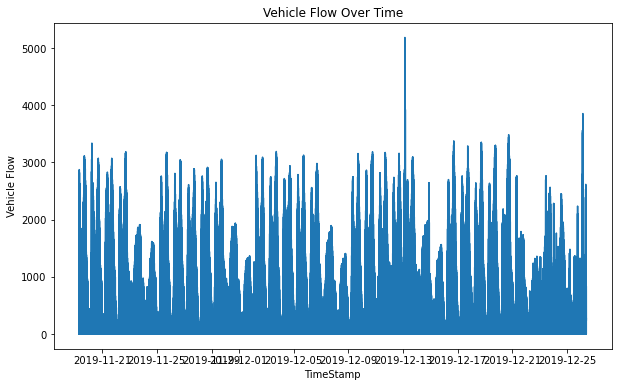

In [83]:
# Time Series Analysis 
green_data['TimeStamp'] = pd.to_datetime(green_data['TimeStamp'])
plt.figure(figsize =(10,6))
plt.plot(green_data['TimeStamp'], green_data['Vehicle Flow'])
plt.title('Vehicle Flow Over Time')
plt.xlabel('TimeStamp')
plt.ylabel('Vehicle Flow')
plt.show()

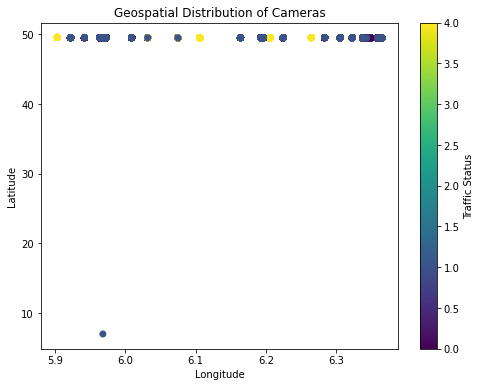

In [84]:
# Geospatial Visualization
plt.figure(figsize=(8, 6))
plt.scatter(green_data['Longitude'], green_data['Latitude'], c=green_data['Traffic Status'].astype('category').cat.codes)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Cameras')
plt.colorbar(label='Traffic Status')
plt.show()

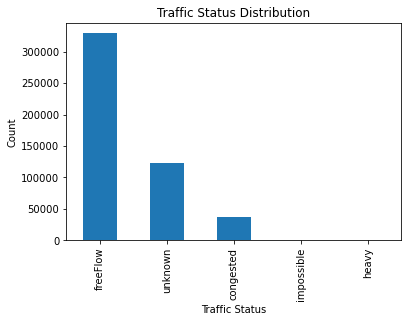

In [87]:
# Traffic Status Analysis
traffic_status_counts = green_data['Traffic Status'].value_counts()
traffic_status_counts.plot(kind='bar')
plt.title('Traffic Status Distribution')
plt.xlabel('Traffic Status')
plt.ylabel('Count')
plt.show()


In [91]:
# Remove the time zone information (+01:00) from the 'TimeStamp' column
green_data['TimeStamp'] = green_data['TimeStamp'].str.replace(r'\+\d+:\d+', '', regex=True)

# Convert 'TimeStamp' to datetime
green_data['TimeStamp'] = pd.to_datetime(green_data['TimeStamp'], format='%Y-%m-%dT%H:%M:%S.000', errors='coerce')

# Drop any missing values
green_data = green_data.dropna(subset=['TimeStamp'])
# Check the updated 'TimeStamp' column
print(green_data['TimeStamp'])

AttributeError: Can only use .str accessor with string values!